# **File ipynb for classification**

**11/08/2023** -  Progetto Hand Robot Team EEG - Andrea Scarpellini, Sara Paratico (if you are modifying this file please write here your name)

This file contains a supervised classification analysis on data collected in 2022. We utilized labeled data collected by Davide and applied various algorithms for the supervised classification.


### **JSON FILES:**
We have 22 file called in the following way.
 - POW000.json

  ...

 - POW021.json

#### **Description**
- "000": An identifier for a reading session.
- "UserID": User identifier, in this case, "M28".
- "Readings": Contains the reading data collected during the session.
- "000000": A key for a specific reading during the session.
- "Phase": The phase of the recording
  - Baseline 000
  - Baseline Occhi Chiusi
  - Sudoku
  - SPIEGARE LE ALTRE
- "Time": The timestamp of the reading, for example, "12:43:49".
- "AF3", "T7", "Pz", "T8", "AF4": Electrode positions on the scalp.
- "Theta", "Alpha", "BetaL", "BetaH", "Gamma": Power for brain waves in their respective frequency bands.


### **What we use**
We use only the data relative to the channels and the label relative to the phase. With those data we should be able to create a model that can desciminate the phases thanks to the values of pow.


- What are the phases that we are interested  in? --> why?
- How much file we should use for training ?
- for testing?
- for validation?



### **Sub-Objective:**
Can we distinguish between different phases?

Questions:

- Which electrodes carry the most significant weight in the data?

- Why are these electrodes crucial?
- What frequency bands exhibit the greatest influence in the dataset?

- Why are these frequency bands noteworthy?
- Which task is most effective in eliciting concentration from the subject?

- Why is this particular task considered optimal?
- Considering a potential user experience, which analyzed task is the most    suitable choice for triggering the robotic arm?
Explanation: What specific action does the subject need to perform to activate the robotic arm, based on our analysis?






In [168]:
import json 
import os
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

import math 
import numpy as np

In [169]:
# Get the current directory (where your Python script is located)
current_directory = os.path.dirname('ML_POW_')

# Initialize an empty list to store the rows
rows = []

# Iterate through all the JSON files in the specified range
for i in range(0, 21):
    # Generate the file name (assuming the format is POWxxx.json)
    json_file_name = f'POW{i:03d}.json'
    print(json_file_name)
    json_file_path = os.path.join(current_directory, 'DB_Macchinine', json_file_name)

    # Check if the file exists before attempting to read it
    if os.path.exists(json_file_path):
        with open(json_file_path, 'r') as json_file:
            data = json.load(json_file)

        # Iterate through the JSON data
        for key, value in data.items():
            user_id = value['UserID']
            readings = value['Readings']
            for reading_key, reading_value in readings.items():
                phase = reading_value['Phase']
                if phase in ["sudoku", "baseline occhi chiusi"]:
                    time = reading_value['Time']
                    af3_theta = reading_value['AF3']['Theta']
                    af3_alpha = reading_value['AF3']['Alpha']
                    af3_betaL = reading_value['AF3']['BetaL']
                    af3_betaH = reading_value['AF3']['BetaH']
                    af3_gamma = reading_value['AF3']['Gamma']

                    t7_theta = reading_value['T7']['Theta']
                    t7_alpha = reading_value['T7']['Alpha']
                    t7_betaL = reading_value['T7']['BetaL']
                    t7_betaH = reading_value['T7']['BetaH']
                    t7_gamma = reading_value['T7']['Gamma']

                    pz_theta = reading_value['Pz']['Theta']
                    pz_alpha = reading_value['Pz']['Alpha']
                    pz_betaL = reading_value['Pz']['BetaL']
                    pz_betaH = reading_value['Pz']['BetaH']
                    pz_gamma = reading_value['Pz']['Gamma']

                    t8_theta = reading_value['T8']['Theta']
                    t8_alpha = reading_value['T8']['Alpha']
                    t8_betaL = reading_value['T8']['BetaL']
                    t8_betaH = reading_value['T8']['BetaH']
                    t8_gamma = reading_value['T8']['Gamma']

                    af4_theta = reading_value['AF4']['Theta']
                    af4_alpha = reading_value['AF4']['Alpha']
                    af4_betaL = reading_value['AF4']['BetaL']
                    af4_betaH = reading_value['AF4']['BetaH']
                    af4_gamma = reading_value['AF4']['Gamma']


                    row = [user_id, phase, time, af3_theta, af3_alpha, af3_betaL, af3_betaH, af3_gamma, t7_theta, t7_alpha, t7_betaL, t7_betaH, t7_gamma,
                           pz_theta, pz_alpha, pz_betaL, pz_betaH, pz_gamma, t8_theta, t8_alpha, t8_betaL, t8_betaH, t8_gamma,
                           af4_theta, af4_alpha, af4_betaL, af4_betaH, af4_gamma]

                    rows.append(row)

# Define columns as before
columns = ['UserID', 'Phase', 'Time', 'AF3_Theta', 'AF3_Alpha', 'AF3_BetaL', 'AF3_BetaH', 'AF3_Gamma', 
           'T7_Theta', 'T7_Alpha', 'T7_BetaL', 'T7_BetaH', 'T7_Gamma', 
           'Pz_Theta', 'Pz_Alpha', 'Pz_BetaL', 'Pz_BetaH', 'Pz_Gamma', 
           'T8_Theta', 'T8_Alpha', 'T8_BetaL', 'T8_BetaH', 'T8_Gamma', 
           'AF4_Theta', 'AF4_Alpha', 'AF4_BetaL', 'AF4_BetaH', 'AF4_Gamma']

# Create a DataFrame from the rows and columns
df = pd.DataFrame(rows, columns=columns)

# Filter the DataFrame to only include rows with 'Phase' as "sudoku" or "baseline occhi chiusi"
filtered_df = df[df['Phase'].isin(["sudoku", "baseline occhi chiusi"])]


POW000.json
POW001.json
POW002.json
POW003.json
POW004.json
POW005.json
POW006.json
POW007.json
POW008.json
POW009.json
POW010.json
POW011.json
POW012.json
POW013.json
POW014.json
POW015.json
POW016.json
POW017.json
POW018.json
POW019.json
POW020.json


In [170]:
columns_to_remove = ['UserID', 'Time']
filtered_df.drop(columns=columns_to_remove, inplace=True)
print(filtered_df.shape)
filtered_df.head()

(35083, 26)


Phase AF3_Theta AF3_Alpha AF3_BetaL AF3_BetaH AF3_Gamma  \
0  baseline occhi chiusi     2.514     4.049     6.891     3.734     2.143   
1  baseline occhi chiusi     2.184     3.739      5.57     3.868     2.017   
2  baseline occhi chiusi      2.03     3.471     4.345     3.931     1.849   
3  baseline occhi chiusi     2.059     3.598     3.408     3.924     1.706   
4  baseline occhi chiusi     2.361     4.377     2.791     3.916     1.643   

  T7_Theta T7_Alpha T7_BetaL T7_BetaH  ... T8_Theta T8_Alpha T8_BetaL  \
0    3.878    3.109    4.454      3.1  ...    3.368    9.275   10.638   
1    3.327     3.66    4.823    3.116  ...    3.754   10.035   10.933   
2    2.814    4.142    5.099    3.022  ...    4.156   10.042   10.698   
3    2.552    4.518    5.164    2.871  ...    4.449    9.434    9.763   
4    2.659    4.794     4.94    2.771  ...    4.548    8.518    8.255   

  T8_BetaH T8_Gamma AF4_Theta AF4_Alpha AF4_BetaL AF4_BetaH AF4_Gamma  
0    3.768    3.033      3.03     5.133     6.916     4.916     2.152  
1    3.293    2.756     2.583     4.833     5.746     5.199     2.108  
2    2.928     2.48     2.429     4.343     4.658       5.4     2.024  
3    2.688    2.236     2.457     4.088     3.804      5.43     1.931  
4    2.589    2.066     2.977     4.451     3.207      5.29     1.858  

[5 rows x 26 columns]

### **Dataset Exploration**

- Balance
- Missing values
- Variable types
- Variable distributions
- Potential variable transformations
- Variable distributions separated by phase
- Possible correlation between channels

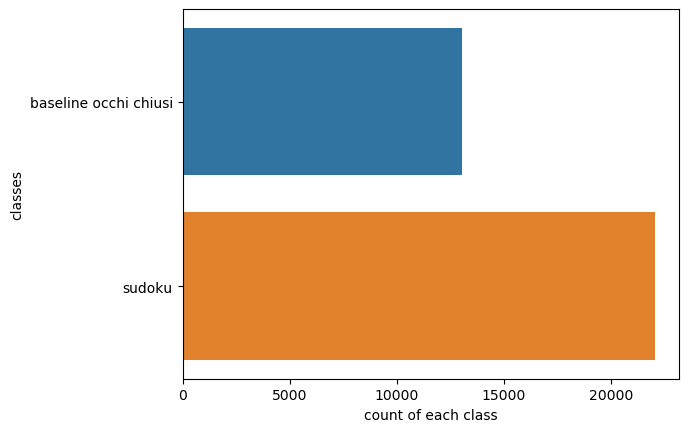

In [171]:
#Visualize Class Counts
sns.countplot(y=filtered_df.Phase ,data=filtered_df)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

The dataset is  not balanced ! Considering boostrapping or elimination of data or something else (ask to a data analyst what  we should do)

In [172]:
filtered_df.isna().any()


Phase        False
AF3_Theta    False
AF3_Alpha    False
AF3_BetaL    False
AF3_BetaH    False
AF3_Gamma    False
T7_Theta     False
T7_Alpha     False
T7_BetaL     False
T7_BetaH     False
T7_Gamma     False
Pz_Theta     False
Pz_Alpha     False
Pz_BetaL     False
Pz_BetaH     False
Pz_Gamma     False
T8_Theta     False
T8_Alpha     False
T8_BetaL     False
T8_BetaH     False
T8_Gamma     False
AF4_Theta    False
AF4_Alpha    False
AF4_BetaL    False
AF4_BetaH    False
AF4_Gamma    False
dtype: bool

In [173]:
print(filtered_df.dtypes)

Phase        object
AF3_Theta    object
AF3_Alpha    object
AF3_BetaL    object
AF3_BetaH    object
AF3_Gamma    object
T7_Theta     object
T7_Alpha     object
T7_BetaL     object
T7_BetaH     object
T7_Gamma     object
Pz_Theta     object
Pz_Alpha     object
Pz_BetaL     object
Pz_BetaH     object
Pz_Gamma     object
T8_Theta     object
T8_Alpha     object
T8_BetaL     object
T8_BetaH     object
T8_Gamma     object
AF4_Theta    object
AF4_Alpha    object
AF4_BetaL    object
AF4_BetaH    object
AF4_Gamma    object
dtype: object


We should chage from object to float the POW numbers.

In [174]:
columns_to_convert = [
    'AF3_Theta', 'AF3_Alpha', 'AF3_BetaL', 'AF3_BetaH', 'AF3_Gamma',
    'T7_Theta', 'T7_Alpha', 'T7_BetaL', 'T7_BetaH', 'T7_Gamma',
    'Pz_Theta', 'Pz_Alpha', 'Pz_BetaL', 'Pz_BetaH', 'Pz_Gamma',
    'T8_Theta', 'T8_Alpha', 'T8_BetaL', 'T8_BetaH', 'T8_Gamma',
    'AF4_Theta', 'AF4_Alpha', 'AF4_BetaL', 'AF4_BetaH', 'AF4_Gamma'
]

# Use the astype method to convert columns to float
filtered_df[columns_to_convert] = filtered_df[columns_to_convert].astype(float)

In [175]:
print(filtered_df.dtypes)

Phase         object
AF3_Theta    float64
AF3_Alpha    float64
AF3_BetaL    float64
AF3_BetaH    float64
AF3_Gamma    float64
T7_Theta     float64
T7_Alpha     float64
T7_BetaL     float64
T7_BetaH     float64
T7_Gamma     float64
Pz_Theta     float64
Pz_Alpha     float64
Pz_BetaL     float64
Pz_BetaH     float64
Pz_Gamma     float64
T8_Theta     float64
T8_Alpha     float64
T8_BetaL     float64
T8_BetaH     float64
T8_Gamma     float64
AF4_Theta    float64
AF4_Alpha    float64
AF4_BetaL    float64
AF4_BetaH    float64
AF4_Gamma    float64
dtype: object


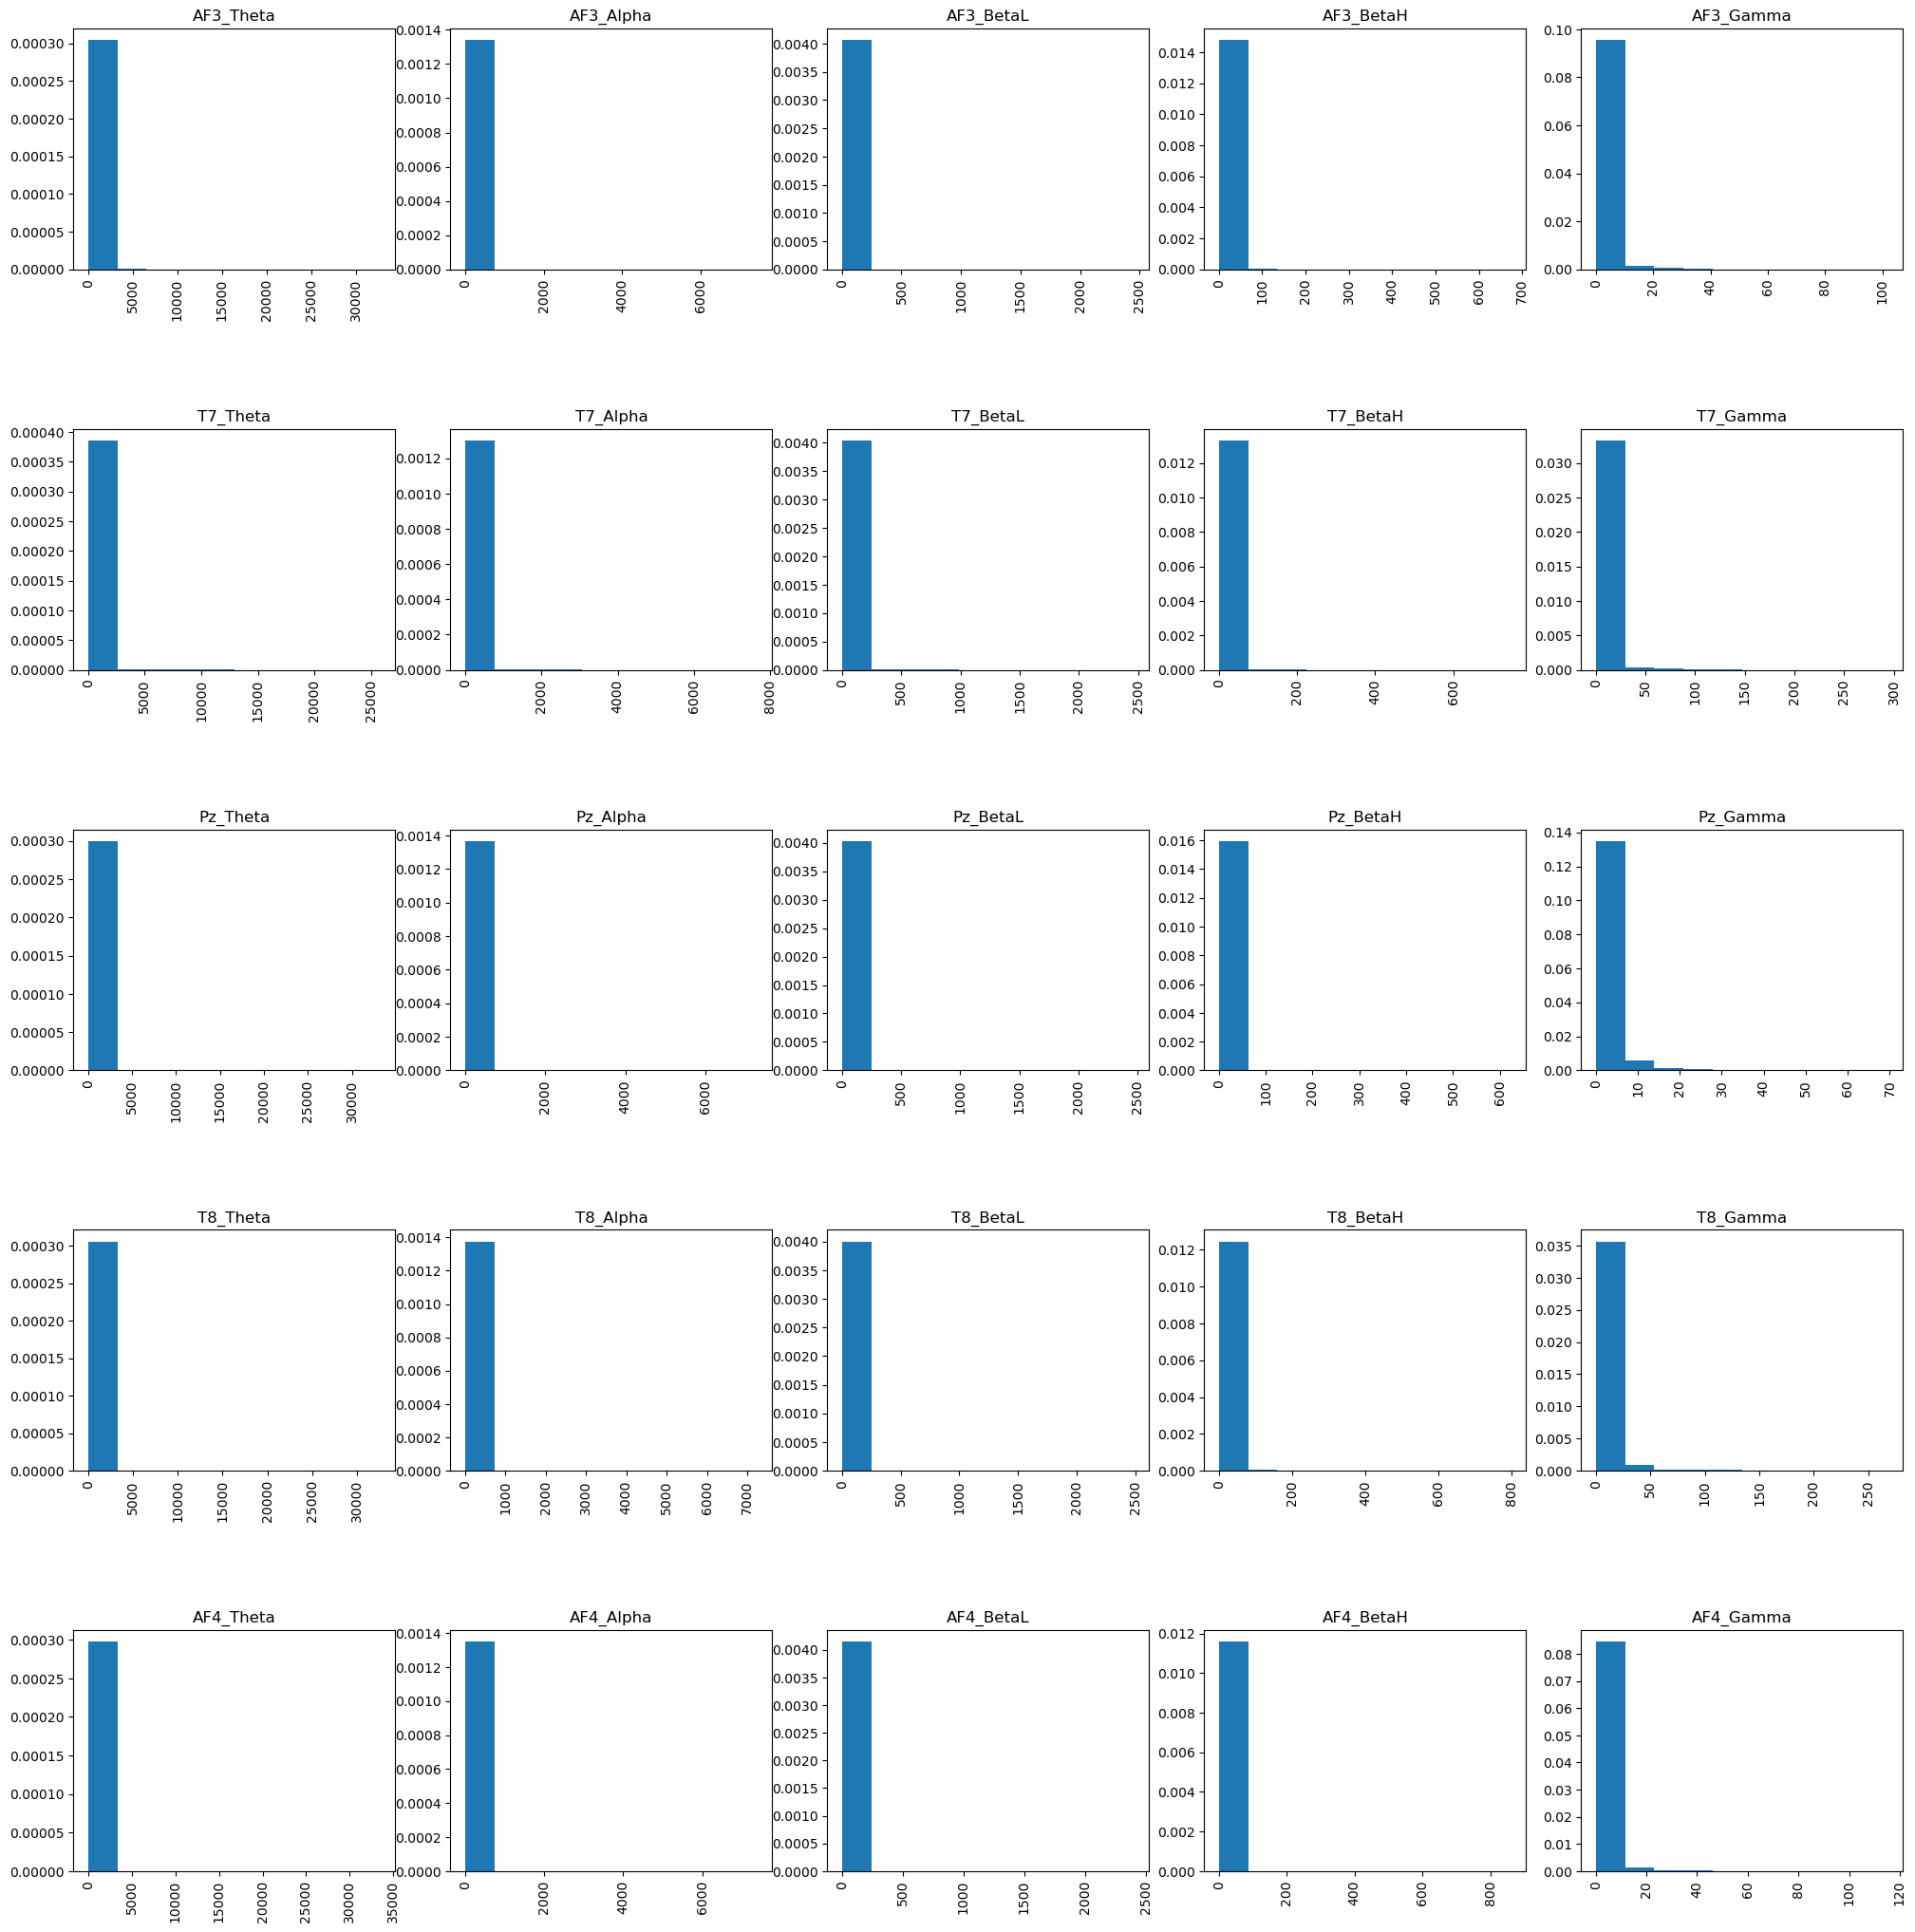

In [176]:
pow = filtered_df [columns_to_convert]

fig, axes = plt.subplots(5, 5,figsize=[20,20])
axes = axes.flatten()
fig.tight_layout(h_pad=10)

i=0
for x in pow.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist(pow[x],density=True)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.title(x)
    i+=1
plt.show()

We would like the data to be as distributed and normal as possible. Since these data points are concentrated around zero and exhibit exponential decay, we apply a logarithm to make them more "normal."

In [177]:
pow_transformed = pow[columns_to_convert].apply(lambda x: x.apply(lambda y: math.log(y + 1)))


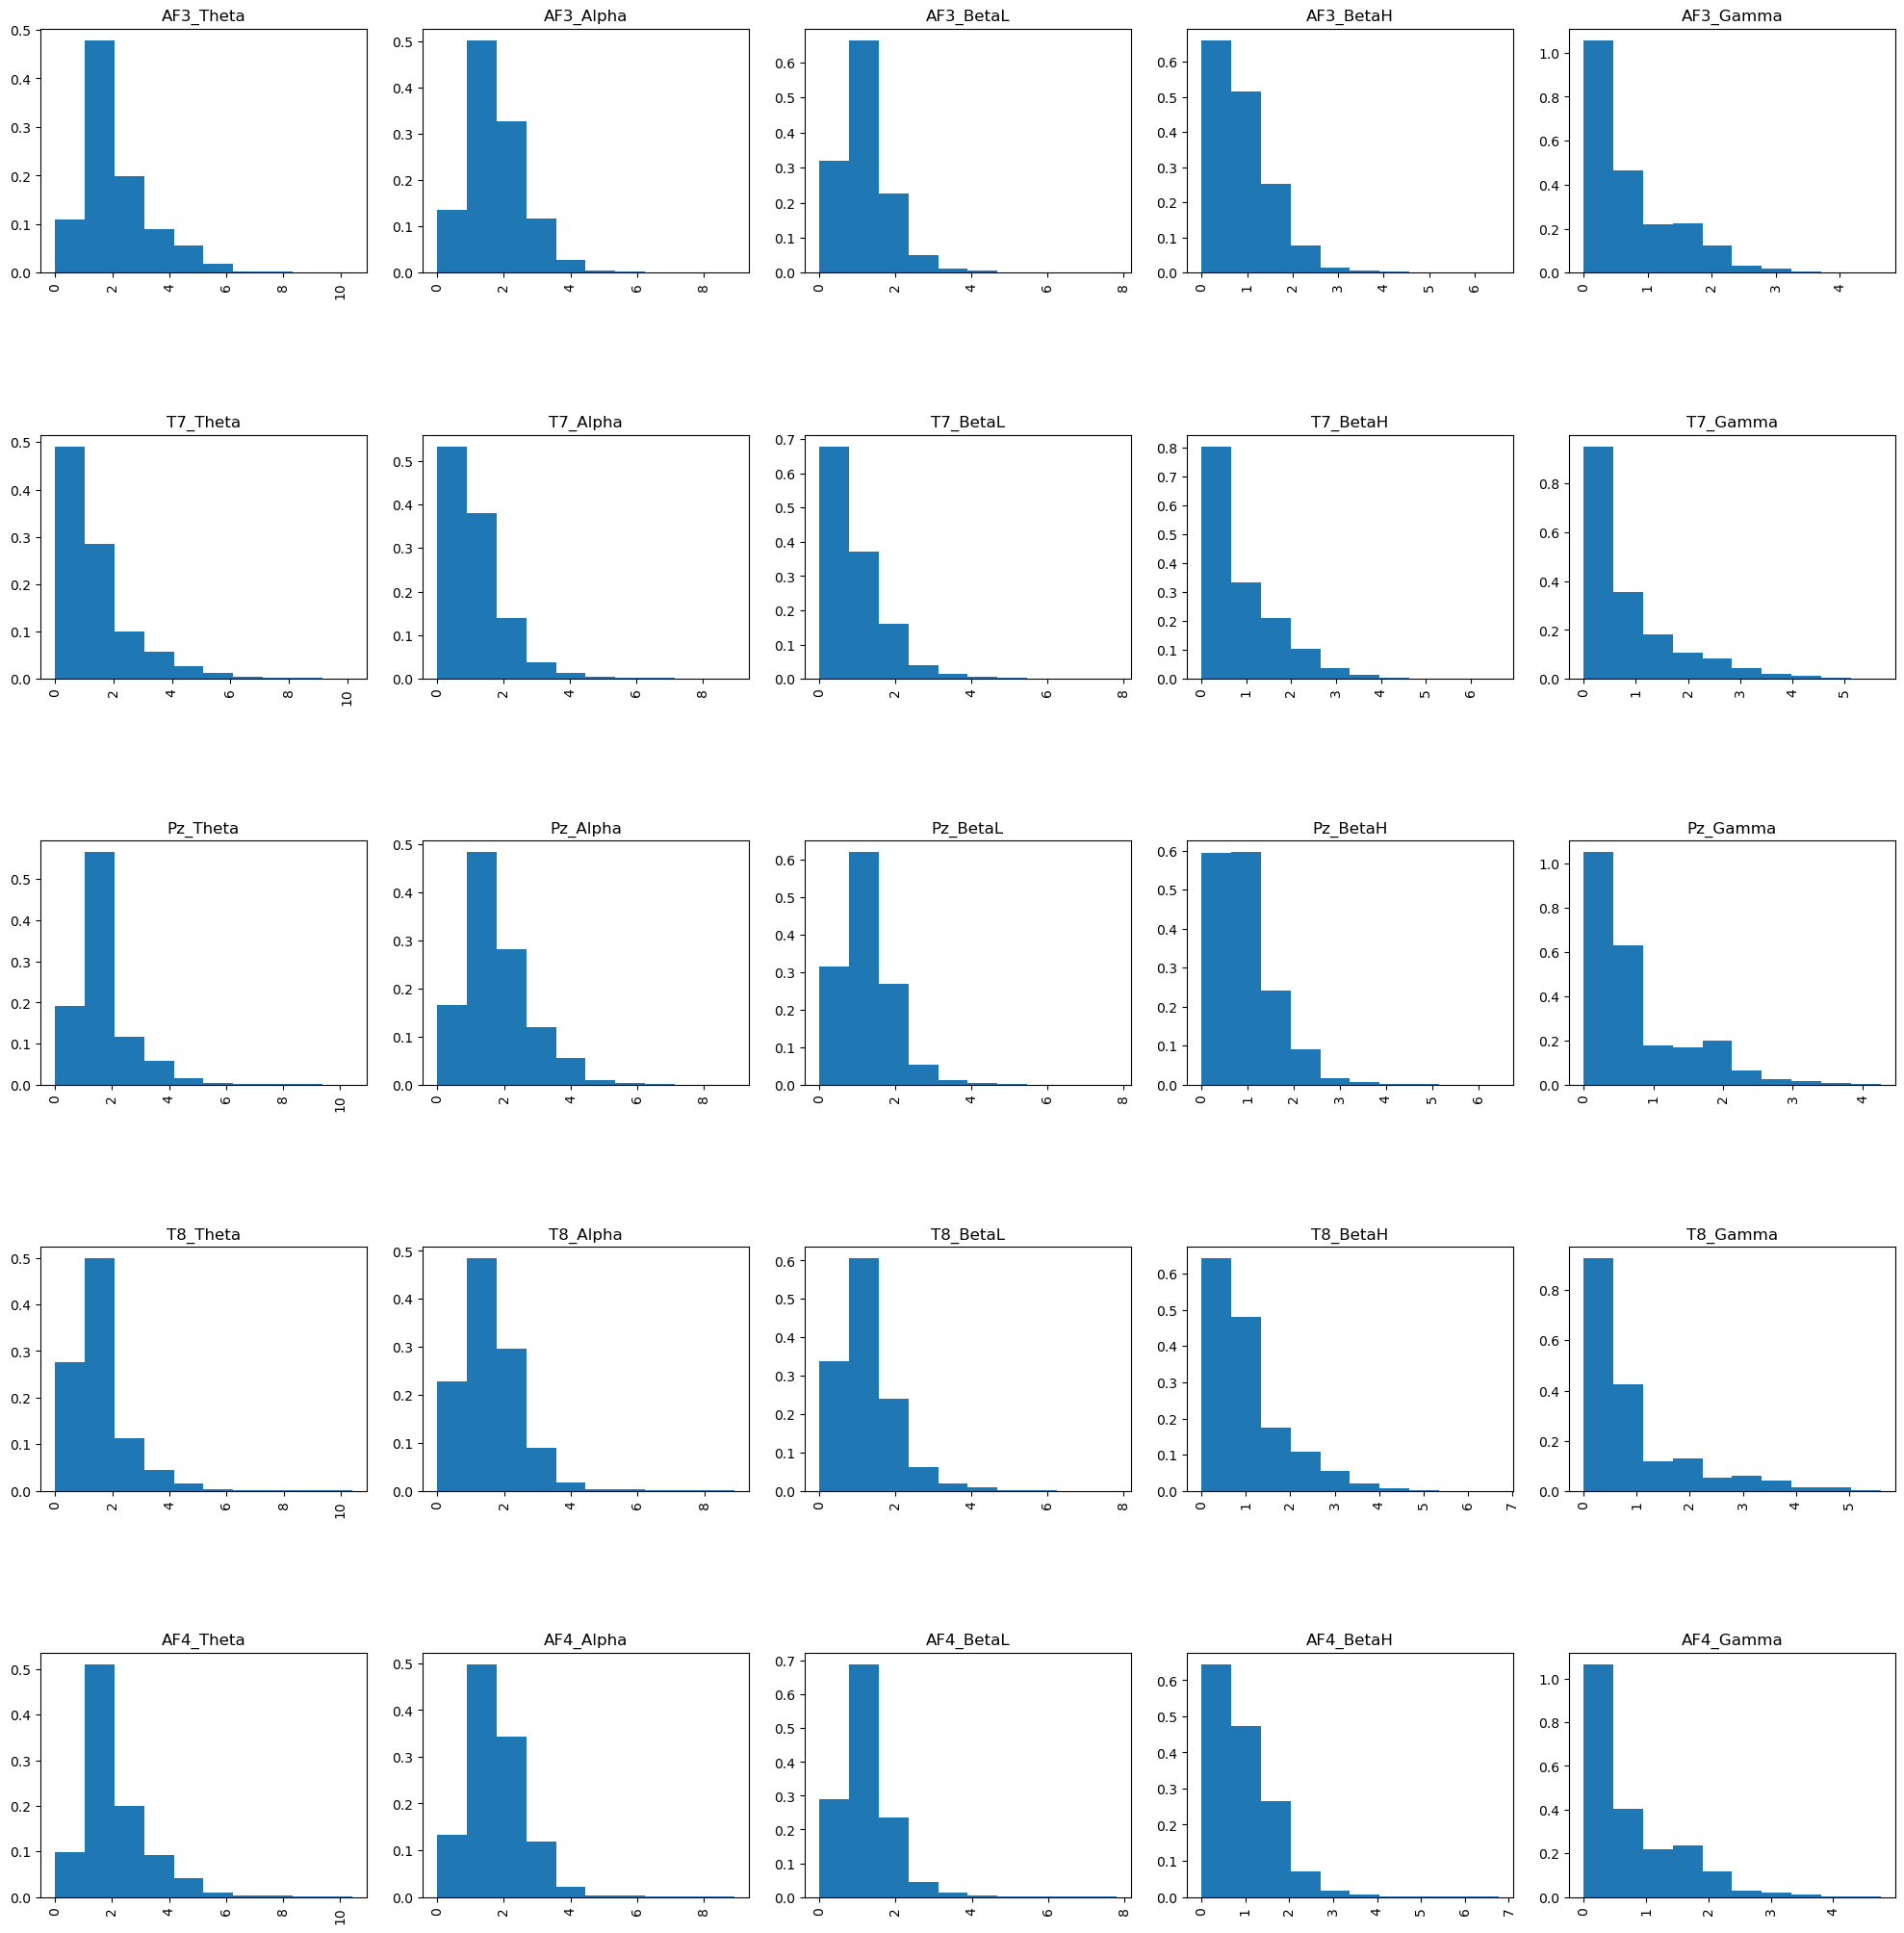

In [178]:
fig, axes = plt.subplots(5, 5,figsize=[20,20])
axes = axes.flatten()
fig.tight_layout(h_pad=10)

i=0
for x in pow_transformed.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist(pow_transformed[x],density=True)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.title(x)
    i+=1
plt.show()

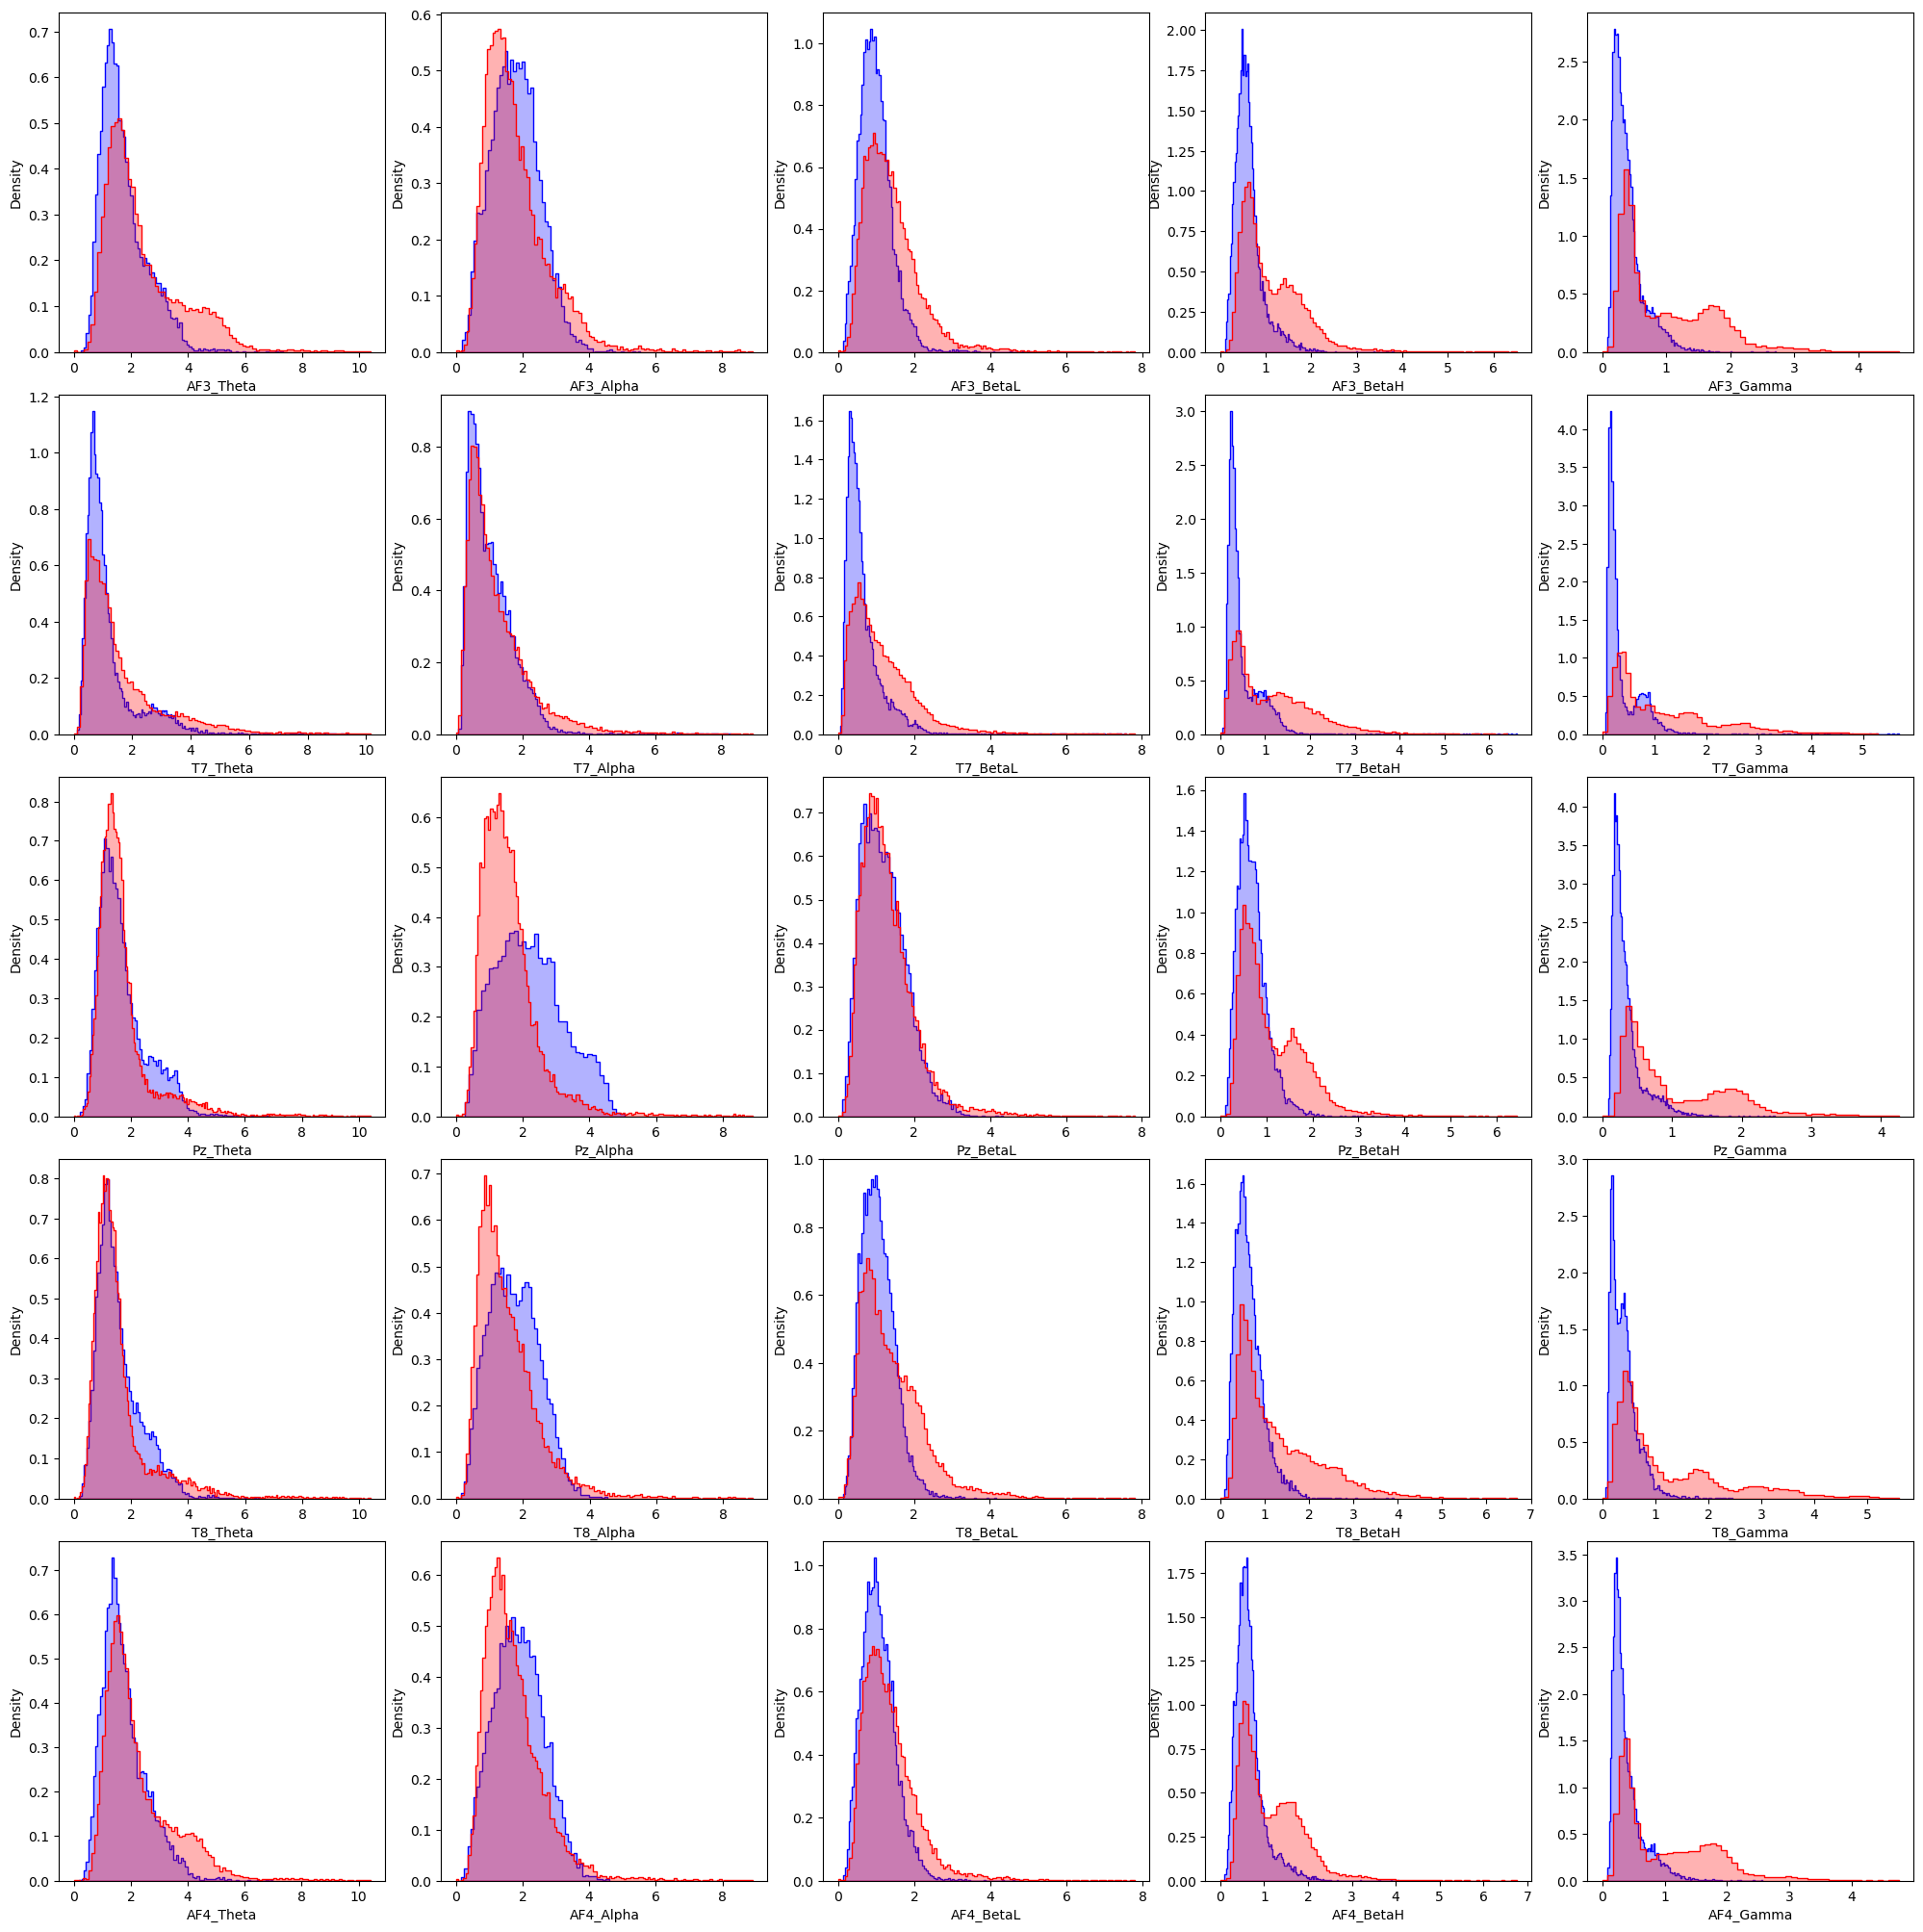

In [179]:
X0 = pow_transformed[filtered_df['Phase']=='baseline occhi chiusi']
X1 = pow_transformed[filtered_df['Phase']=='sudoku']

fig, axes = plt.subplots(ncols=5, nrows=5, figsize=(20,20))
fig.tight_layout()

for i, ax in zip(range(pow.columns.size), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", ax=ax, stat='density', element="step",  alpha=0.3)
    sns.histplot(X1.iloc[:,i], color="red",  ax=ax,stat='density', element="step",  alpha=0.3)
plt.show()


### Correlazione 





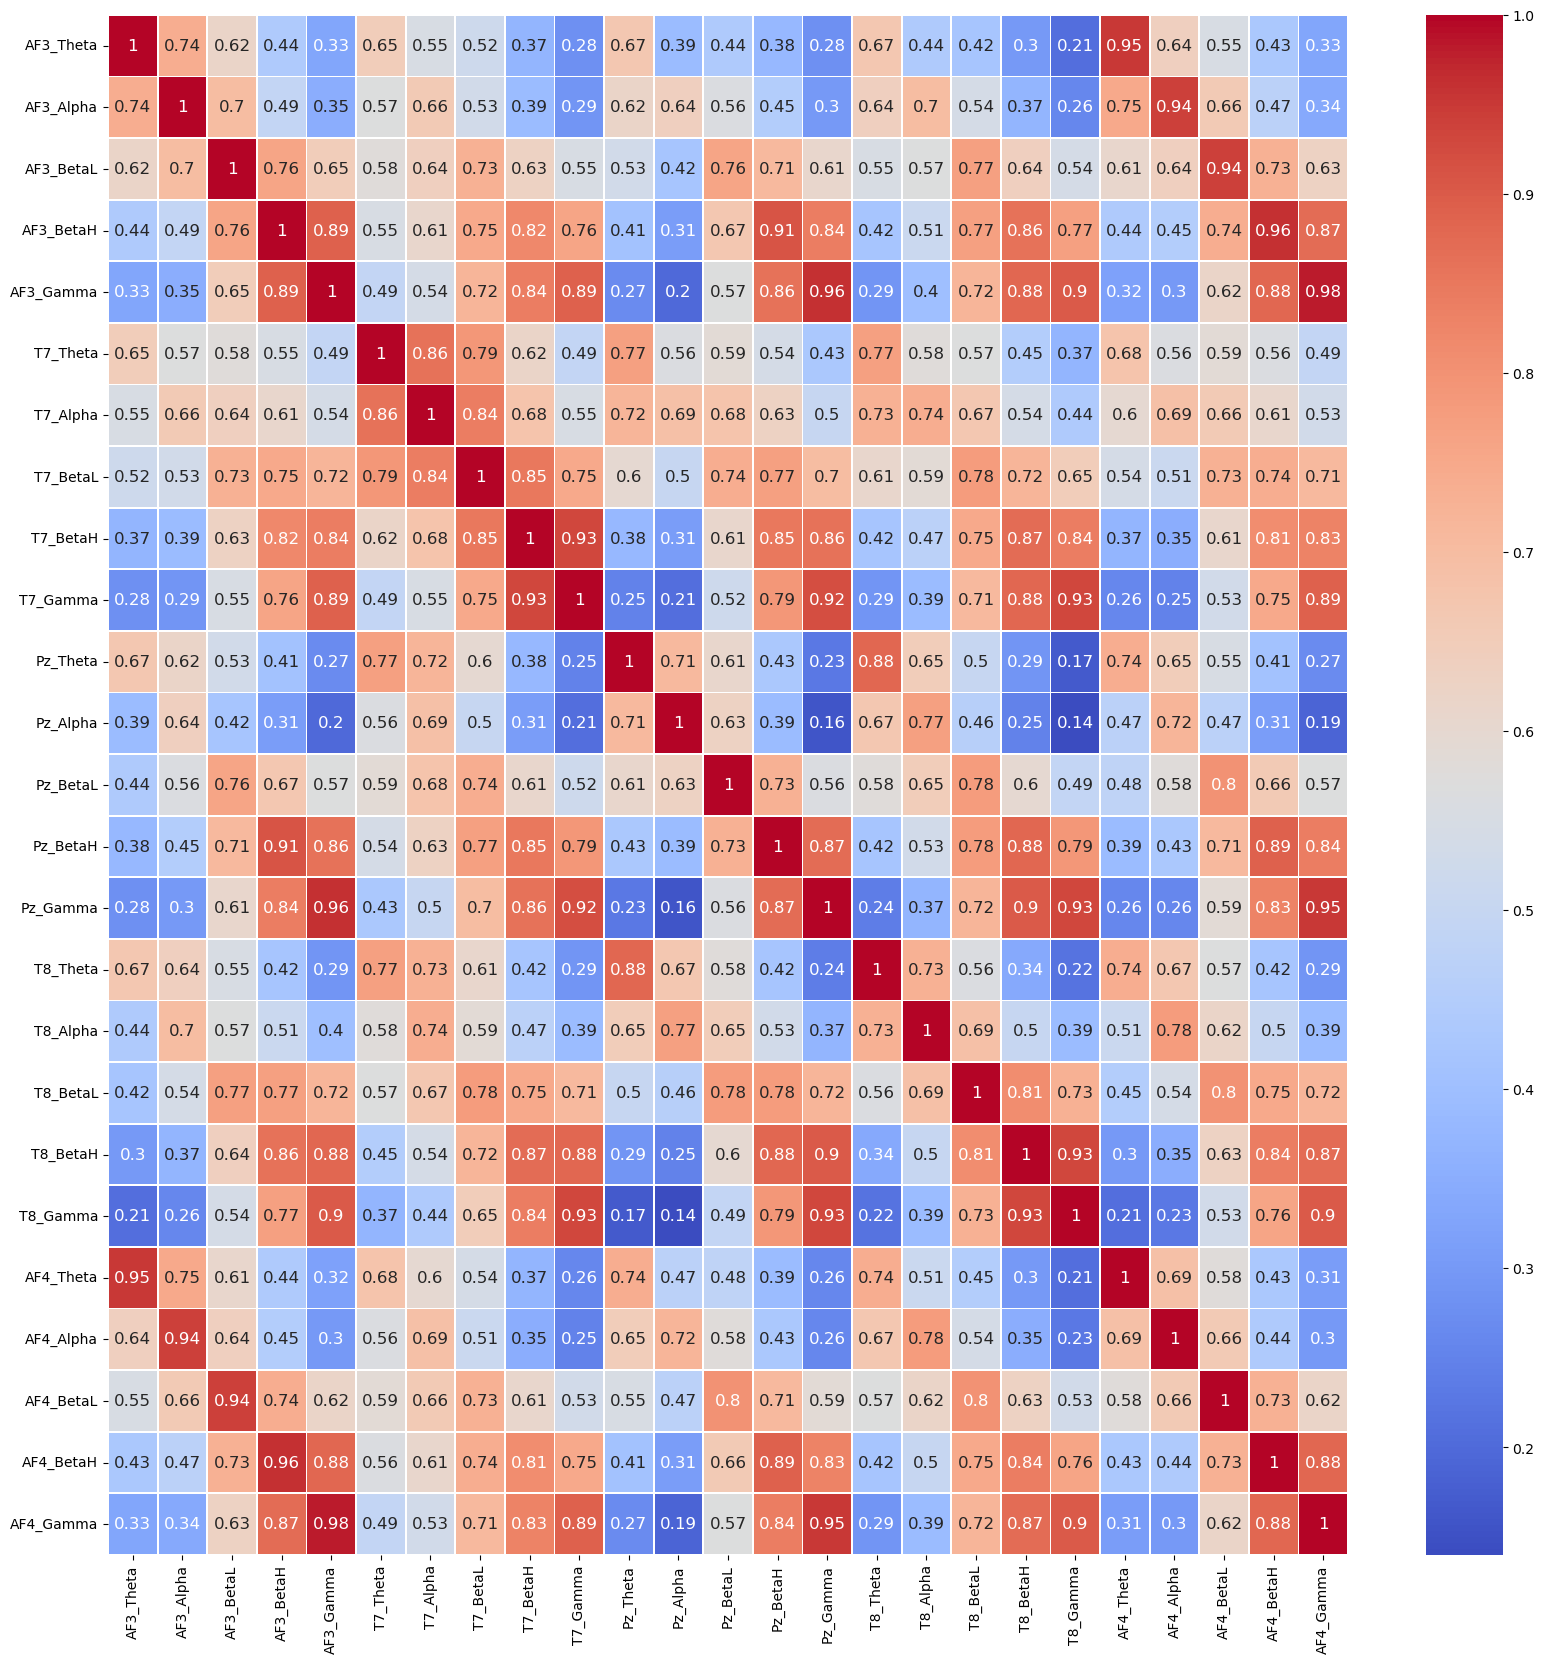

In [184]:
pow_transformed_copied = pow_transformed.copy()
pow_transformed_copied['Phase']=df['Phase']
plt.figure(figsize = (20,20))
sns.heatmap(data=pow_transformed_copied.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

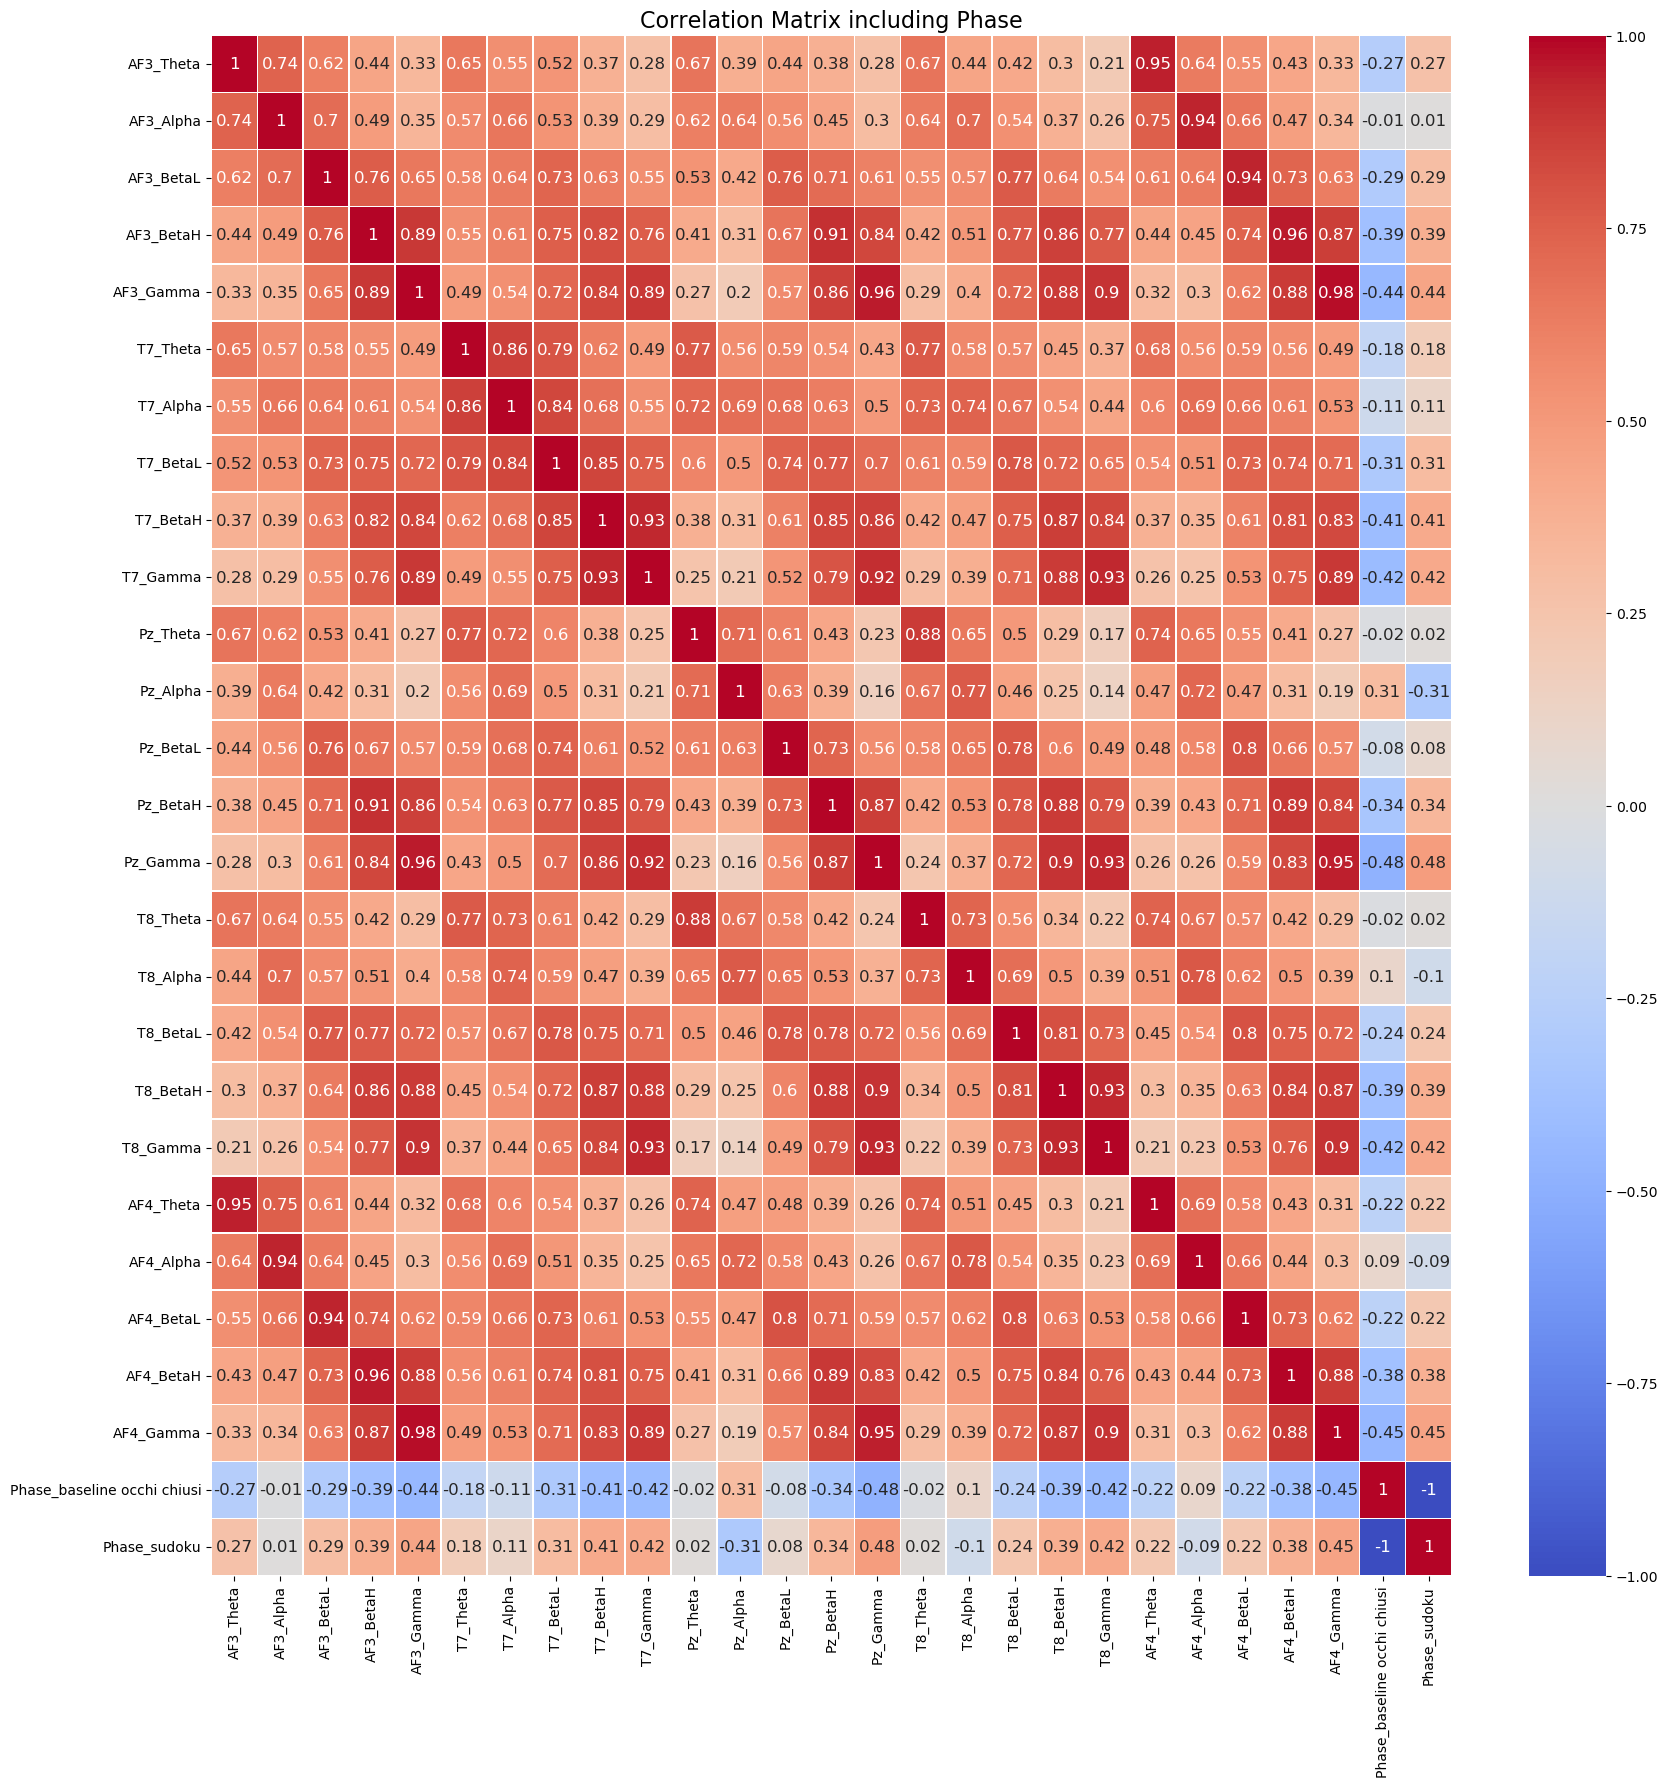

In [185]:
# One-hot encode 'Phase'
phase_dummies = pd.get_dummies(df['Phase'], prefix='Phase')
pow_transformed_copied = pd.concat([pow_transformed_copied, phase_dummies], axis=1)

plt.figure(figsize=(20, 20))
sns.heatmap(data=pow_transformed_copied.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size": 12})
plt.title('Correlation Matrix including Phase', fontsize=16)
plt.show()

In [186]:
pow_transformed_copied

AF3_Theta  AF3_Alpha  AF3_BetaL  AF3_BetaH  AF3_Gamma  T7_Theta  \
0       1.256755   1.619190   2.065723   1.554771   1.145178  1.584735   
1       1.158138   1.555826   1.882514   1.582683   1.104263  1.464874   
2       1.108563   1.497612   1.676162   1.595542   1.046968  1.338679   
3       1.118088   1.525621   1.483421   1.594121   0.995472  1.267511   
4       1.212239   1.682131   1.332630   1.592495   0.971915  1.297190   
...          ...        ...        ...        ...        ...       ...   
35078   1.542015   1.185401   0.491643   0.485508   0.164667  0.581657   
35079   1.453018   1.148354   0.493476   0.491643   0.147558  0.582216   
35080   1.354029   1.072610   0.498348   0.479335   0.139762  0.546386   
35081   1.278152   0.970400   0.503197   0.454255   0.142367  0.478096   
35082   1.265820   0.867521   0.504405   0.429182   0.157004  0.389336   

       T7_Alpha  T7_BetaL  T7_BetaH  T7_Gamma  ...  T8_BetaH  T8_Gamma  \
0      1.413180  1.696349  1.410987  1.313992  ...  1.561927  1.394511   
1      1.539015  1.761816  1.414882  1.246457  ...  1.456986  1.323355   
2      1.637442  1.808125  1.391779  1.177423  ...  1.368130  1.247032   
3      1.708015  1.818726  1.353513  1.136550  ...  1.305084  1.174338   
4      1.756823  1.781709  1.327340  1.143267  ...  1.277874  1.120374   
...         ...       ...       ...       ...  ...       ...       ...   
35078  0.372253  0.194744  0.179818  0.185649  ...  0.629675  0.468127   
35079  0.349952  0.175633  0.194744  0.175633  ...  0.650761  0.501987   
35080  0.306013  0.144100  0.208639  0.170586  ...  0.643957  0.527093   
35081  0.251537  0.106160  0.219938  0.173113  ...  0.617345  0.542906   
35082  0.199670  0.069526  0.231112  0.184818  ...  0.585005  0.551007   

       AF4_Theta  AF4_Alpha  AF4_BetaL  AF4_BetaH  AF4_Gamma  \
0       1.393766   1.813684   2.068886   1.777661   1.148037   
1       1.276200   1.763531   1.908950   1.824388   1.133979   
2       1.232269   1.675787   1.733070   1.856298   1.106580   
3       1.240401   1.626885   1.569449   1.860975   1.075344   
4       1.380528   1.695799   1.436750   1.838961   1.050122   
...          ...        ...        ...        ...        ...   
35078   1.166582   1.106911   0.587787   0.514618   0.221542   
35079   1.171863   1.123630   0.547543   0.521172   0.202941   
35080   1.193316   1.097945   0.496524   0.509825   0.188138   
35081   1.284538   1.025683   0.441476   0.483660   0.182322   
35082   1.475449   0.924259   0.393393   0.453620   0.187309   

                       Phase  Phase_baseline occhi chiusi  Phase_sudoku  
0      baseline occhi chiusi                            1             0  
1      baseline occhi chiusi                            1             0  
2      baseline occhi chiusi                            1             0  
3      baseline occhi chiusi                            1             0  
4      baseline occhi chiusi                            1             0  
...                      ...                          ...           ...  
35078                 sudoku                            0             1  
35079                 sudoku                            0             1  
35080                 sudoku                            0             1  
35081                 sudoku                            0             1  
35082                 sudoku                            0             1  

[35083 rows x 28 columns]

### PCA

In [153]:
#PCA fit
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(pow_transformed)

#let's use the pca to transform the dataset
pow_transformed_pca = pd.DataFrame(pca.transform(pow_transformed))
pow_transformed_pca.columns =['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25']


pd.DataFrame(pca.components_,index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25'],columns=pow_transformed.columns)

AF3_Theta  AF3_Alpha  AF3_BetaL  AF3_BetaH  AF3_Gamma  T7_Theta  \
PC1    0.274638   0.204717   0.169017   0.151041   0.145213  0.321933   
PC2   -0.278021  -0.169277   0.029564   0.147919   0.222464 -0.129308   
PC3    0.578369   0.041162   0.069323   0.048839   0.070752 -0.033607   
PC4   -0.068876  -0.403393  -0.191455  -0.065465  -0.013189  0.591776   
PC5   -0.095443  -0.215680   0.390157   0.151674  -0.022150 -0.037775   
PC6   -0.050258   0.282966   0.167034   0.032236  -0.011960  0.371144   
PC7    0.134784  -0.074563  -0.116386   0.091852   0.117488 -0.126191   
PC8    0.186530  -0.130091   0.083718  -0.332396  -0.225317 -0.198456   
PC9   -0.241094   0.317923   0.165093  -0.206076   0.008202 -0.006345   
PC10  -0.036357   0.094371  -0.061664   0.223160  -0.147024 -0.437160   
PC11  -0.043525   0.068017  -0.244532   0.014008  -0.280910  0.200038   
PC12   0.012340   0.108645   0.047821   0.093343  -0.138540  0.292351   
PC13   0.078012  -0.133431   0.409955   0.087007  -0.116413  0.038089   
PC14  -0.331260  -0.231216  -0.053552  -0.046649  -0.072315 -0.067401   
PC15   0.314222   0.210153   0.064871   0.088421   0.041091 -0.067764   
PC16   0.093785  -0.020562   0.167622  -0.092165  -0.129822  0.011785   
PC17  -0.058354  -0.056900  -0.054672   0.014269   0.017228 -0.010668   
PC18  -0.044825  -0.011073   0.069023  -0.160409   0.042970  0.065336   
PC19  -0.384021   0.383144   0.358919   0.187759   0.029941  0.028623   
PC20   0.010991  -0.039952  -0.037437   0.288595  -0.285417  0.024668   
PC21   0.036803  -0.093549   0.052108   0.135448  -0.019819  0.002842   
PC22   0.055044  -0.422352   0.310660   0.395279   0.132640  0.017199   
PC23  -0.023626   0.183761  -0.395576   0.396640   0.016946  0.018126   
PC24  -0.024409   0.031359  -0.193105   0.314627   0.429389  0.004648   
PC25  -0.006212  -0.006538   0.032729  -0.321016   0.644031  0.002007   

      T7_Alpha  T7_BetaL  T7_BetaH  T7_Gamma  ...  T8_Theta  T8_Alpha  \
PC1   0.241084  0.209037  0.190014  0.184602  ...  0.243084  0.199661   
PC2  -0.049472  0.085590  0.219355  0.305260  ... -0.233474 -0.080143   
PC3  -0.201082 -0.054253  0.005145  0.035824  ... -0.118498 -0.336080   
PC4   0.176747  0.168462  0.125291  0.094136  ...  0.177909 -0.214541   
PC5  -0.132733  0.091802 -0.122623 -0.276222  ...  0.071399 -0.186714   
PC6   0.347439  0.213635  0.060983 -0.052265  ... -0.452161 -0.184110   
PC7  -0.064903 -0.020007  0.036717  0.018835  ... -0.374401 -0.340025   
PC8   0.055287  0.337437  0.209016  0.269241  ... -0.105654 -0.070824   
PC9  -0.152179 -0.026365  0.027175  0.232112  ...  0.069390 -0.455302   
PC10  0.256179  0.264391  0.440063  0.039159  ...  0.242093 -0.137811   
PC11 -0.115503 -0.084185  0.107073 -0.165428  ... -0.451961  0.022050   
PC12 -0.490431 -0.162673  0.223121  0.067178  ...  0.337583 -0.272542   
PC13 -0.070798 -0.079173  0.149700  0.055828  ... -0.266852  0.220853   
PC14  0.293645 -0.016118 -0.167040 -0.192935  ...  0.066429 -0.373951   
PC15  0.319078 -0.084851 -0.240817 -0.183788  ...  0.092525 -0.320618   
PC16  0.360702 -0.439819 -0.024063 -0.018037  ...  0.084286  0.047239   
PC17  0.214280 -0.651163  0.291409  0.311776  ... -0.040538 -0.065007   
PC18 -0.096360  0.064731 -0.035978 -0.144609  ...  0.043130  0.007117   
PC19 -0.005599 -0.017698 -0.008414 -0.001962  ... -0.026834  0.054907   
PC20 -0.003871  0.078684 -0.394225  0.353698  ...  0.019854 -0.002132   
PC21 -0.022385 -0.046067  0.470215 -0.536384  ...  0.028229 -0.001768   
PC22  0.008193 -0.031335 -0.070437  0.093717  ... -0.029080 -0.056467   
PC23 -0.022653  0.003140  0.022338 -0.065762  ...  0.003348 -0.009200   
PC24  0.000915  0.013073 -0.044485  0.058561  ... -0.024608  0.008395   
PC25 -0.004570 -0.003813  0.038695 -0.038963  ... -0.000497 -0.000172   

      T8_BetaL  T8_BetaH  T8_Gamma  AF4_Theta  AF4_Alpha  AF4_BetaL  \
PC1   0.183679  0.180080  0.184453   0.258230   0.190402   0.161801   
PC2   0.115675  0.267635  0.368541  -0.276511  -0.173147   0.02734

In [154]:
pd.DataFrame(pca.explained_variance_).transpose()

0         1         2         3         4         5         6   \
0  11.097544  3.440772  1.212773  0.880846  0.395197  0.378373  0.248453   

         7         8         9   ...        15        16        17        18  \
0  0.207853  0.137643  0.131963  ...  0.058754  0.044888  0.038864  0.025175   

         19        20        21        22        23        24  
0  0.020583  0.017328  0.017009  0.012684  0.010026  0.004959  

[1 rows x 25 columns]

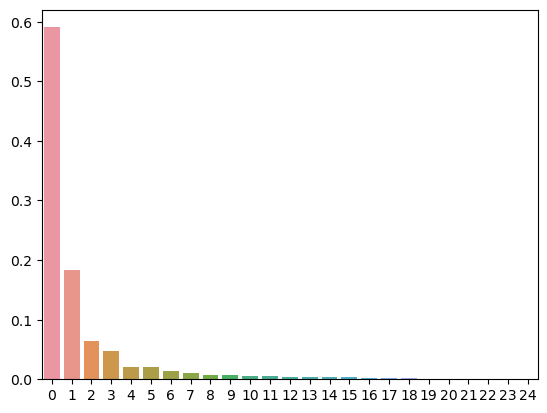

In [155]:
#VISUALIZE The percentage of variance explained by each of the selected components.
explained_var=pd.DataFrame(pca.explained_variance_ratio_).transpose()
ax = sns.barplot( data=explained_var)

In [156]:
cum_explained_var=np.cumsum(pca.explained_variance_ratio_)
cum_explained_var= pd.DataFrame(cum_explained_var).transpose()
cum_explained_var

0         1         2         3         4         5         6   \
0  0.590625  0.773747  0.838292  0.885171  0.906204  0.926342  0.939565   

         7         8         9   ...        15        16        17        18  \
0  0.950627  0.957952  0.964976  ...  0.989807  0.992196  0.994265  0.995605   

       19        20        21        22        23   24  
0  0.9967  0.997622  0.998527  0.999202  0.999736  1.0  

[1 rows x 25 columns]

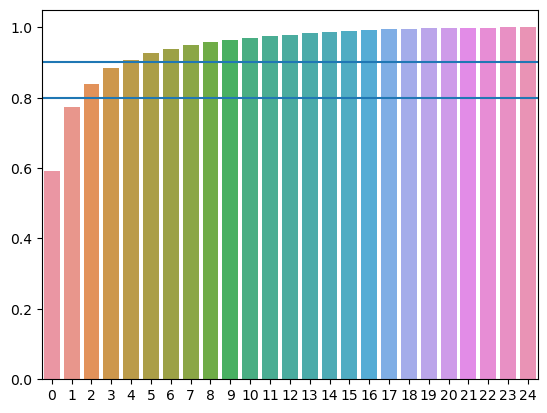

In [157]:
ax = sns.barplot(data=cum_explained_var)
ax.axhline(0.9)
ax.axhline(0.8)

In [160]:
import plotly.graph_objects as go

def myplot(score, coeff, labels=None):
    fig = go.Figure()

    xs = score[:, 0]
    ys = score[:, 1]
    zs = score[:, 2]

    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    scalez = 1.0 / (zs.max() - zs.min())

    fig.add_trace(go.Scatter3d(
        x=xs * scalex,
        y=ys * scaley,
        z=zs * scalez,
        mode='markers',
        marker=dict(
            size=6,
            color='blue',  # You can customize the color
        ),
        text=labels
    ))

    for i in range(n):
        fig.add_trace(go.Cone(
            x=[0],
            y=[0],
            z=[0],
            u=[coeff[i, 0]],
            v=[coeff[i, 1]],
            w=[coeff[i, 2]],
            sizemode='absolute',
            sizeref=0.1,
            colorscale='Viridis',  # You can customize the colorscale
            cmin=coeff[:, 2].min(),  # Adjust according to your data
            cmax=coeff[:, 2].max(),  # Adjust according to your data
            colorbar=dict(title='Color Scale'),
            opacity=0.5
        ))

        if attributes is not None:
                    fig.add_trace(go.Scatter3d(
                        x=[coeff[i, 0]],
                        y=[coeff[i, 1]],
                        z=[coeff[i, 2]],
                        mode='text',
                        text=[attributes[i]],
                        textposition="top center",
                        showlegend=False
                    ))

    fig.update_layout(scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2'),
        zaxis=dict(title='PC3')
    ))

    fig.show()
attributes= columns_to_convert;
# Call the function. Use the first 3 PCs.
myplot(pca.transform(pow_transformed)[:, 0:3], np.transpose(pca.components_[0:3, :]), pow_transformed.columns)


# Features Selection 

Based

In [202]:
# Add the target column to the correlation matrix
correlation_matrix_s = pow_transformed_copied.corrwith(pow_transformed_copied['Phase_sudoku'])
correlation_matrix_bs = pow_transformed_copied.corrwith(pow_transformed_copied['Phase_baseline occhi chiusi'])
# Identify columns with correlation less than 0.05
low_correlation_columns_sudoku = correlation_matrix[abs(correlation_matrix_s) < 0.1].index
low_correlation_columns_baselineocchichiusi = correlation_matrix[abs(correlation_matrix_bs) < 0.1].index
# Print or store the names of columns with low correlation
print("Columns with correlation less than 0.05 with the target:")

print("\nLow correlation with Sudoku",low_correlation_columns_sudoku)
print("\nLow correlation with Baseline occhi chiusi",low_correlation_columns_baselineocchichiusi)

Columns with correlation less than 0.05 with the target:

Low correlation with Sudoku Index(['AF3_Alpha', 'Pz_Theta', 'Pz_BetaL', 'T8_Theta', 'AF4_Alpha'], dtype='object')

Low correlation with Baseline occhi chiusi Index(['AF3_Alpha', 'Pz_Theta', 'Pz_BetaL', 'T8_Theta', 'AF4_Alpha'], dtype='object')


In [166]:
pow_transformed_copied

AF3_Theta  AF3_Alpha  AF3_BetaL  AF3_BetaH  AF3_Gamma  T7_Theta  \
0       1.256755   1.619190   2.065723   1.554771   1.145178  1.584735   
1       1.158138   1.555826   1.882514   1.582683   1.104263  1.464874   
2       1.108563   1.497612   1.676162   1.595542   1.046968  1.338679   
3       1.118088   1.525621   1.483421   1.594121   0.995472  1.267511   
4       1.212239   1.682131   1.332630   1.592495   0.971915  1.297190   
...          ...        ...        ...        ...        ...       ...   
35078   1.542015   1.185401   0.491643   0.485508   0.164667  0.581657   
35079   1.453018   1.148354   0.493476   0.491643   0.147558  0.582216   
35080   1.354029   1.072610   0.498348   0.479335   0.139762  0.546386   
35081   1.278152   0.970400   0.503197   0.454255   0.142367  0.478096   
35082   1.265820   0.867521   0.504405   0.429182   0.157004  0.389336   

       T7_Alpha  T7_BetaL  T7_BetaH  T7_Gamma  ...  AF4_Gamma  \
0      1.413180  1.696349  1.410987  1.313992  ...   1.148037   
1      1.539015  1.761816  1.414882  1.246457  ...   1.133979   
2      1.637442  1.808125  1.391779  1.177423  ...   1.106580   
3      1.708015  1.818726  1.353513  1.136550  ...   1.075344   
4      1.756823  1.781709  1.327340  1.143267  ...   1.050122   
...         ...       ...       ...       ...  ...        ...   
35078  0.372253  0.194744  0.179818  0.185649  ...   0.221542   
35079  0.349952  0.175633  0.194744  0.175633  ...   0.202941   
35080  0.306013  0.144100  0.208639  0.170586  ...   0.188138   
35081  0.251537  0.106160  0.219938  0.173113  ...   0.182322   
35082  0.199670  0.069526  0.231112  0.184818  ...   0.187309   

                       Phase  Phase_baseline occhi chiusi  Phase_sudoku  \
0      baseline occhi chiusi                            1             0   
1      baseline occhi chiusi                            1             0   
2      baseline occhi chiusi                            1             0   
3      baseline occhi chiusi                            1             0   
4      baseline occhi chiusi                            1             0   
...                      ...                          ...           ...   
35078                 sudoku                            0             1   
35079                 sudoku                            0             1   
35080                 sudoku                            0             1   
35081                 sudoku                            0             1   
35082                 sudoku                            0             1   

       Phase_baseline occhi chiusi  Phase_sudoku  Phase_baseline occhi chiusi  \
0                                1             0                            1   
1                                1             0                            1   
2                                1             0                            1   
3                                1             0                            1   
4                                1             0                            1   
...                            ...           ...                          ...   
35078                            0             1                            0   
35079                            0             1                            0   
35080                            0             1                            0   
35081                            0             1                            0   
35082                            0             1                            0   

       Phase_sudoku  Phase_baseline occhi chiusi  Phase_sudoku  
0                 0                            1             0  
1                 0                            1             0  
2                 0                            1             0  
3                 0                            1             0  
4                 0                            1             0  
...             ...                          ...           ...  
35078   

# Classification 

In [66]:
X = pow_transformed.copy()  # Make a copy to avoid modifying the original DataFrame
print(X.shape)
y = (filtered_df['Phase'] == 'sudoku').astype(int)
print(len(y))
print(y.value_counts())

(35083, 25)
35083
1    22033
0    13050
Name: Phase, dtype: int64


In [67]:
X.tail()

AF3_Theta  AF3_Alpha  AF3_BetaL  AF3_BetaH  AF3_Gamma  T7_Theta  \
35078   1.542015   1.185401   0.491643   0.485508   0.164667  0.581657   
35079   1.453018   1.148354   0.493476   0.491643   0.147558  0.582216   
35080   1.354029   1.072610   0.498348   0.479335   0.139762  0.546386   
35081   1.278152   0.970400   0.503197   0.454255   0.142367  0.478096   
35082   1.265820   0.867521   0.504405   0.429182   0.157004  0.389336   

       T7_Alpha  T7_BetaL  T7_BetaH  T7_Gamma  ...  T8_Theta  T8_Alpha  \
35078  0.372253  0.194744  0.179818  0.185649  ...  0.909870  0.765003   
35079  0.349952  0.175633  0.194744  0.175633  ...  1.045563  0.715398   
35080  0.306013  0.144100  0.208639  0.170586  ...  1.137512  0.696143   
35081  0.251537  0.106160  0.219938  0.173113  ...  1.190888  0.690143   
35082  0.199670  0.069526  0.231112  0.184818  ...  1.210750  0.684106   

       T8_BetaL  T8_BetaH  T8_Gamma  AF4_Theta  AF4_Alpha  AF4_BetaL  \
35078  0.664748  0.629675  0.468127   1.166582   1.106911   0.587787   
35079  0.622725  0.650761  0.501987   1.171863   1.123630   0.547543   
35080  0.604862  0.643957  0.527093   1.193316   1.097945   0.496524   
35081  0.601032  0.617345  0.542906   1.284538   1.025683   0.441476   
35082  0.599935  0.585005  0.551007   1.475449   0.924259   0.393393   

       AF4_BetaH  AF4_Gamma  
35078   0.514618   0.221542  
35079   0.521172   0.202941  
35080   0.509825   0.188138  
35081   0.483660   0.182322  
35082   0.453620   0.187309  

[5 rows x 25 columns]

In [68]:
y.tail()

35078    1
35079    1
35080    1
35081    1
35082    1
Name: Phase, dtype: int32

In [69]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30,   
                                                    stratify=y,        #preserve target propotions (probviamo non stratificata)
                                                    random_state= 2)   #fix random seed for replicability

print( X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24558, 25) (10525, 25) (24558,) (10525,)


In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

#Funzioni


def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)
    print("\n")
    print("f1         train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) ))  
    print("\n")
    print(confusion_matrix(y_test, y_pred))
    return ( f1_score(y_train, y_pred_train),f1_score(y_test, y_pred) )

def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.3f' % auc)
    return (fpr, tpr ,auc)

## Tree

In [71]:
#Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth':          np.arange(5,10,1),
              'min_samples_split':  np.arange(5,50,1),
              'min_samples_leaf':   [2,4,6,7]}

tree_f1_train,tree_f1_test=hyperp_search(classifier,parameters)

Fitting 3 folds for each of 1800 candidates, totalling 5400 fits
f1_train: 0.954967 using {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 7}


f1         train 0.971   test 0.960


[[3561  354]
 [ 179 6431]]


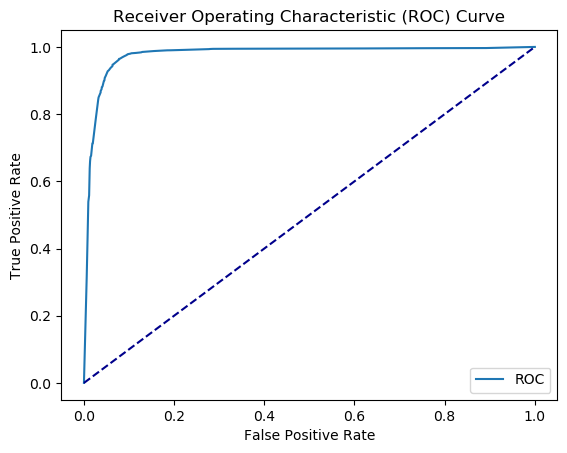

AUC: 0.977


In [203]:
model = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf=4, min_samples_split=5)

fpr, tpr ,auc = roc(model,X_train,y_train,X_test,y_test)

In [73]:
 from sklearn.ensemble import RandomForestClassifier


classifier= RandomForestClassifier()
parameters = {'n_estimators' :     [8,10,100],
              'criterion' :        ['entropy', 'gini'],
              'max_depth' :        np.arange(5,10,1), 
              'min_samples_split': np.arange(5,10,1),
              'min_samples_leaf' : [2,4,6,8,]
             };


RF_f1_train,RF_f1_test=hyperp_search(classifier,parameters)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits
f1_train: 0.971776 using {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


f1         train 0.982   test 0.974


[[3623  292]
 [  62 6548]]


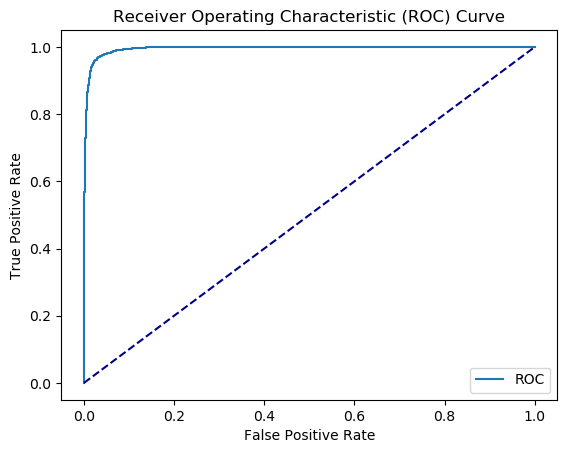

AUC: 0.995


In [204]:
model = RandomForestClassifier(criterion='gini', max_depth=9, min_samples_leaf=2, min_samples_split=8, n_estimators=100)

fpr, tpr ,auc = roc(model,X_train,y_train,X_test,y_test)

# Validation 

In [78]:
 # Generate the file name (assuming the format is POWxxx.json)
json_file_name = f'POW021.json'
print(json_file_name)
json_file_path = os.path.join(current_directory, 'DB_Macchinine', json_file_name)

# Check if the file exists before attempting to read it
if os.path.exists(json_file_path):
    with open(json_file_path, 'r') as json_file:
        data = json.load(json_file)

    # Iterate through the JSON data
    for key, value in data.items():
        user_id = value['UserID']
        readings = value['Readings']
        for reading_key, reading_value in readings.items():
            phase = reading_value['Phase']
            if phase in ["sudoku", "baseline occhi chiusi"]:
                time = reading_value['Time']
                af3_theta = reading_value['AF3']['Theta']
                af3_alpha = reading_value['AF3']['Alpha']
                af3_betaL = reading_value['AF3']['BetaL']
                af3_betaH = reading_value['AF3']['BetaH']
                af3_gamma = reading_value['AF3']['Gamma']

                t7_theta = reading_value['T7']['Theta']
                t7_alpha = reading_value['T7']['Alpha']
                t7_betaL = reading_value['T7']['BetaL']
                t7_betaH = reading_value['T7']['BetaH']
                t7_gamma = reading_value['T7']['Gamma']

                pz_theta = reading_value['Pz']['Theta']
                pz_alpha = reading_value['Pz']['Alpha']
                pz_betaL = reading_value['Pz']['BetaL']
                pz_betaH = reading_value['Pz']['BetaH']
                pz_gamma = reading_value['Pz']['Gamma']

                t8_theta = reading_value['T8']['Theta']
                t8_alpha = reading_value['T8']['Alpha']
                t8_betaL = reading_value['T8']['BetaL']
                t8_betaH = reading_value['T8']['BetaH']
                t8_gamma = reading_value['T8']['Gamma']

                af4_theta = reading_value['AF4']['Theta']
                af4_alpha = reading_value['AF4']['Alpha']
                af4_betaL = reading_value['AF4']['BetaL']
                af4_betaH = reading_value['AF4']['BetaH']
                af4_gamma = reading_value['AF4']['Gamma']


                row = [user_id, phase, time, af3_theta, af3_alpha, af3_betaL, af3_betaH, af3_gamma, t7_theta, t7_alpha, t7_betaL, t7_betaH, t7_gamma,
                       pz_theta, pz_alpha, pz_betaL, pz_betaH, pz_gamma, t8_theta, t8_alpha, t8_betaL, t8_betaH, t8_gamma,
                       af4_theta, af4_alpha, af4_betaL, af4_betaH, af4_gamma]

                rows.append(row)

# Define columns as before
columns = ['UserID', 'Phase', 'Time', 'AF3_Theta', 'AF3_Alpha', 'AF3_BetaL', 'AF3_BetaH', 'AF3_Gamma', 
           'T7_Theta', 'T7_Alpha', 'T7_BetaL', 'T7_BetaH', 'T7_Gamma', 
           'Pz_Theta', 'Pz_Alpha', 'Pz_BetaL', 'Pz_BetaH', 'Pz_Gamma', 
           'T8_Theta', 'T8_Alpha', 'T8_BetaL', 'T8_BetaH', 'T8_Gamma', 
           'AF4_Theta', 'AF4_Alpha', 'AF4_BetaL', 'AF4_BetaH', 'AF4_Gamma']

# Create a DataFrame from the rows and columns
df_validation = pd.DataFrame(rows, columns=columns)

# Filter the DataFrame to only include rows with 'Phase' as "sudoku" or "baseline occhi chiusi"
filtered_df_validation = df[df['Phase'].isin(["sudoku", "baseline occhi chiusi"])]


POW021.json


In [81]:
columns_to_remove = ['UserID', 'Time']
filtered_df_validation.drop(columns=columns_to_remove, inplace=True)
print(filtered_df_validation.shape)
filtered_df_validation.head()

(35083, 26)


Phase AF3_Theta AF3_Alpha AF3_BetaL AF3_BetaH AF3_Gamma  \
0  baseline occhi chiusi     2.514     4.049     6.891     3.734     2.143   
1  baseline occhi chiusi     2.184     3.739      5.57     3.868     2.017   
2  baseline occhi chiusi      2.03     3.471     4.345     3.931     1.849   
3  baseline occhi chiusi     2.059     3.598     3.408     3.924     1.706   
4  baseline occhi chiusi     2.361     4.377     2.791     3.916     1.643   

  T7_Theta T7_Alpha T7_BetaL T7_BetaH  ... T8_Theta T8_Alpha T8_BetaL  \
0    3.878    3.109    4.454      3.1  ...    3.368    9.275   10.638   
1    3.327     3.66    4.823    3.116  ...    3.754   10.035   10.933   
2    2.814    4.142    5.099    3.022  ...    4.156   10.042   10.698   
3    2.552    4.518    5.164    2.871  ...    4.449    9.434    9.763   
4    2.659    4.794     4.94    2.771  ...    4.548    8.518    8.255   

  T8_BetaH T8_Gamma AF4_Theta AF4_Alpha AF4_BetaL AF4_BetaH AF4_Gamma  
0    3.768    3.033      3.03     5.133     6.916     4.916     2.152  
1    3.293    2.756     2.583     4.833     5.746     5.199     2.108  
2    2.928     2.48     2.429     4.343     4.658       5.4     2.024  
3    2.688    2.236     2.457     4.088     3.804      5.43     1.931  
4    2.589    2.066     2.977     4.451     3.207      5.29     1.858  

[5 rows x 26 columns]

In [87]:
X_validation = filtered_df_validation [columns_to_convert]
y_validation = (filtered_df_validation ['Phase']== 'sudoku').astype(int)

In [88]:
y_pred = model.predict(X_validation)

In [89]:
correct_predictions = (y_validation == y_pred).sum()
total_predictions = len(y_validation)
accuracy_percentage = (correct_predictions / total_predictions) * 100

print(f"Accuracy: {accuracy_percentage:.2f}%")

Accuracy: 84.52%
